In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "data.json"


In [2]:
# load data
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    #convert lists to numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs, targets
    

inputs, targets = load_data(DATASET_PATH)

In [3]:
# split to train/test
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.3)

In [6]:
# build network arch
model = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
    
    # 1st hidden layers
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax") # for 10 categories. #neuron with highest value...
])

# for overfitting
# simpler architecture -- brittle result from too many layers or neurons -- overlearns 'ornament' -- no universal rule
# data augmentation -- apply transformations to audio files. pitch shifting. time stretching. noise. artificial training samples.
# early stopping. stop while you're ahead. rules for stopping.
# dropout -- randomly drop neurons while training -- increase robustness -- dropout probability 0.1-0.5... problem-dependent
# regularization -- add penalty to error function -- punish large weights -- L1 and L2 
#        -- L1 adds lambda * W to loss. L2 minimize squared value, better for complex data... worse for outliers --L2 for audio, generally


In [8]:
# compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [9]:
# train network
history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=50, batch_size=32)

Epoch 1/50
219/219 [==============================] - 3s 15ms/step - loss: 27.9273 - accuracy: 0.1606 - val_loss: 4.0136 - val_accuracy: 0.1954
Epoch 2/50
219/219 [==============================] - 3s 14ms/step - loss: 7.3496 - accuracy: 0.1661 - val_loss: 3.4549 - val_accuracy: 0.1704
Epoch 3/50
219/219 [==============================] - 3s 14ms/step - loss: 4.7775 - accuracy: 0.1452 - val_loss: 3.4535 - val_accuracy: 0.1364
Epoch 4/50
219/219 [==============================] - 3s 14ms/step - loss: 4.0390 - accuracy: 0.1395 - val_loss: 3.4541 - val_accuracy: 0.1257
Epoch 5/50
219/219 [==============================] - 3s 14ms/step - loss: 3.7700 - accuracy: 0.1383 - val_loss: 3.4521 - val_accuracy: 0.1317
Epoch 6/50
219/219 [==============================] - 3s 14ms/step - loss: 3.6383 - accuracy: 0.1381 - val_loss: 3.4219 - val_accuracy: 0.1450
Epoch 7/50
219/219 [==============================] - 3s 14ms/step - loss: 3.5791 - accuracy: 0.1431 - val_loss: 3.3910 - val_accuracy: 0.166

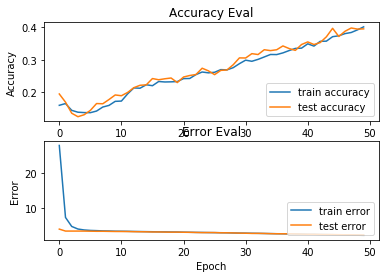

In [10]:
#plot accuracy and error over epochs
def plot_history(history):
    fig, axs = plt.subplots(2)
    
    #create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="lower right")
    axs[1].set_title("Error Eval") 
    
    plt.show()

plot_history(history)